# Datascience

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

**Bon courage !**



# 1. Importer les libraries nécerssaires

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [247]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

# 2. Importation des données et des statistiques descriptives:

In [248]:
df = pd.read_csv("dataset.csv", parse_dates=['deadline','launched'], converters={'ID': str})

In [249]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [250]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null object
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 43.3+ MB


In [252]:
type(df.deadline)

pandas.core.series.Series

In [253]:
print("Le dataset comporte {} samples et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset comporte 378661 samples et 15 variables.


In [254]:
num_col = []
text_col = []
date_col = []
for c in df.columns:
    if df[c].dtype == 'object':
        text_col.append(c)
    elif df[c].dtype == '<M8[ns]':
        date_col.append(c)
    else:
        num_col.append(c)
print(f"Le data a:\t{len(num_col)} numériques colonnes,\n\t\t{len(text_col)} type string colonne,\n\t\t{len(date_col)} type date colonne")

Le data a:	6 numériques colonnes,
		7 type string colonne,
		2 type date colonne


In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


# 3. Vérifier ne pas avoir doublant donnée en regardant la colonne ID

In [256]:
print(f"Data Frame a {df.shape[0]} lignes et {df.shape[1]} colonnes")
print(f"La colonne d'ID a {df.ID.nunique()} de la valeur identique")
df.duplicated().sum()

Data Frame a 378661 lignes et 15 colonnes
La colonne d'ID a 378661 de la valeur identique


0

>**Il n'y a pas des doublants données**

# 4. Les données manquants:

In [257]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [258]:
df[df.name.isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


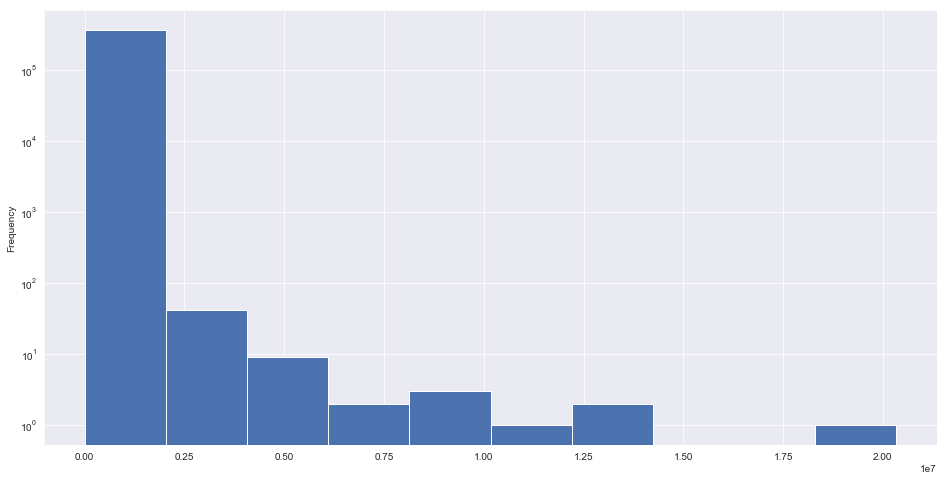

In [259]:
fig, ax = plt.subplots()
df['usd pledged'].dropna().plot.hist(ax=ax)
ax.set_yscale('log')

In [260]:
#df[df['usd pledged'].isna() & (df.state == 'successful')]
#df[(df['usd pledged'] == 0.) & (df.state == 'successful')]
df['usd pledged'].mean()

7036.728867109212

**On a deux colonnes qui contienne la valeur manquant (NaN)**

**- Pour la colonne `name`, il y a 4 valeurs manquants. Cette colonne est comme le title du projet et elle rapporte un peu dans le model de prédire la réussite du projet, par contre, la colonne `category` est vachement importante qui va être exploré au dessous.**

**- Dans ce context, tout les valeurs manquants de `name`, on remplace par 'unknown' ou on le laisse comme ça. il ne nous faut pas les supprimer. Pour la colonne `usd pledged`, on choissit de remplacer par la moyenne de cette colonne.**

### Remplace des valeurs manques:

In [261]:
df.name.fillna('unknown', inplace=True)
df["usd pledged"].fillna(df['usd pledged'].mean(), inplace=True)
# re-tester des valeurs manquants
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

# 5. Analyse des outliers:

Text(0.5,0.98,'Analyse des outliers')

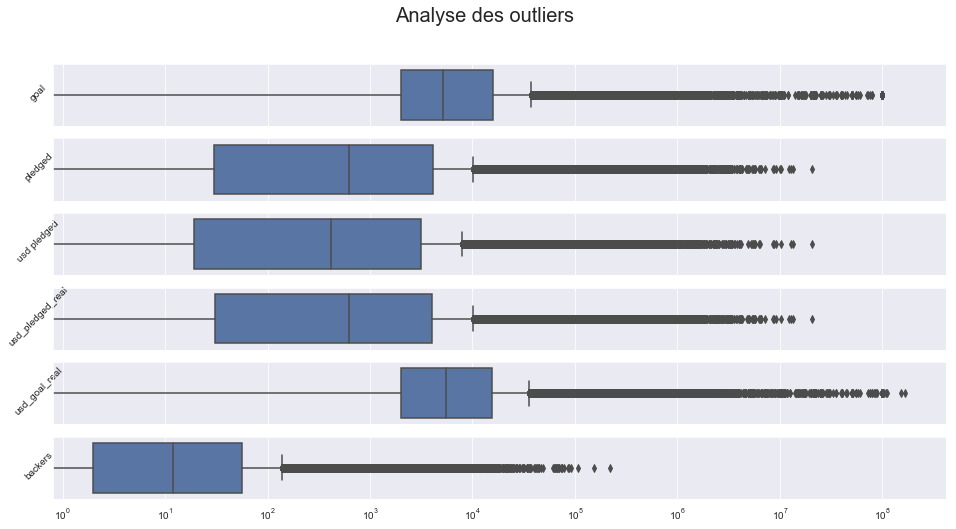

In [262]:
fig, ax = plt.subplots(6, sharex=True)
for i,c in enumerate(["goal","pledged","usd pledged","usd_pledged_real","usd_goal_real","backers"]):
    sns.boxplot(df[c],ax=ax[i])
    ax[i].set_xscale("log")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(c, fontsize=10,rotation=45)
fig.suptitle('Analyse des outliers', fontsize=20)
#fig.set_figheight(25)

In [263]:
df[df.backers == df.backers.max()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0


**On a beaucoup de outliers dans des colonnes numériques, mais on ne pourrait pas les supprimer parce que ils influent ou impacte au la réussite du projet**

- On normalise les données parce que la valeur est volumineux et afin de règler les outliers que on aborde au-dessus.

In [264]:
for c in num_col:
    df[c + "_norm"] = np.log(df[c] + 1)

# 5. Analyse uni-varié:

Au premier temps, On observe tout des valeurs possibles pour chaque colonnes dans le data

In [265]:
df.nunique()

ID                       378661
name                     375765
category                    159
main_category                15
currency                     14
deadline                   3164
goal                       8353
launched                 378089
pledged                   62130
state                         6
backers                    3963
country                      23
usd pledged               95456
usd_pledged_real         106065
usd_goal_real             50339
goal_norm                  8353
pledged_norm              62130
backers_norm               3963
usd pledged_norm          95456
usd_pledged_real_norm    106065
usd_goal_real_norm        50339
dtype: int64

In [266]:
df[text_col].nunique()

ID               378661
name             375765
category            159
main_category        15
currency             14
state                 6
country              23
dtype: int64

- Comme on a abordé au-dessus, la colonne `name` et même `ID` ne servent pas beaucoup de chose dans model de prédire la réussite du projet.

### La colonne `state`:

In [267]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

**`state` contienne 4 valeurs, cette colonne est le target du projet qui va être considéré comme si le projet serait réusit**

**J'ai balayé un petit peu sur le site de `kickstarter` pour savoir précisément des features. Le principle est d'un projet qui va être présenter sur le site pour des `backer` va contribuer ou support, soutenir ce projet, le projet a le but de fond pour réaliser si le fond contribué est égal ou supérieur au le but, ce projet est `successful`, évidement avant de `deadline`. Dans le temps d'appel de contribution, le projet est en `live`. `failed` stipule ce projet est échec ou `cancelled` est arêté avant de deadline ou en pause `suspended`**

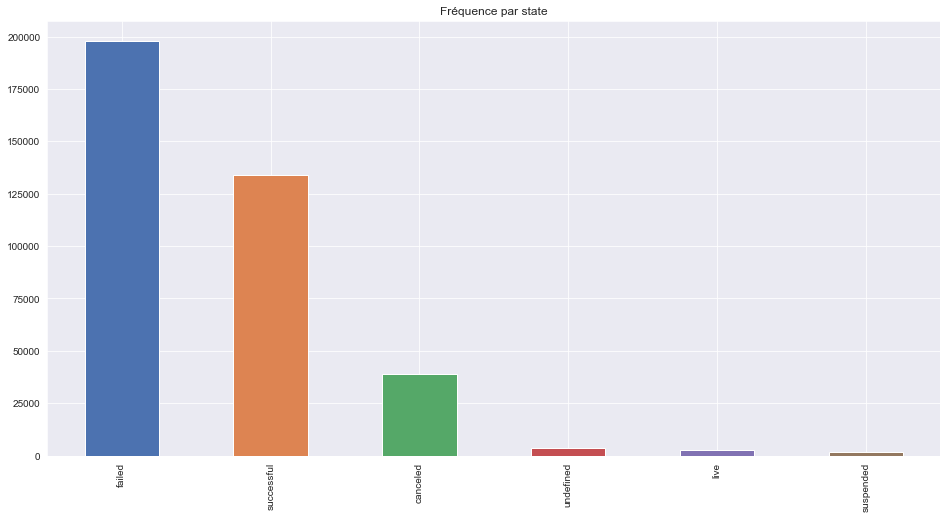

In [268]:
df.state.value_counts().plot.bar(title='Fréquence par state')

**On remarque que la colonne `state` est unbalance, c-à-d, la proportion de chaque catégorie est très différent, `failed` va domminer `suspended`, `live`, `undefined`. Pour l'apprentissage supervisé, unbalanced label est un gros problème**

**Notre objectif est de prédire si le projet serait réusit, donc que `failed` et `successful` on s'intéresse**

In [269]:
df_failed = df[df.state == "failed"]
df_successfull = df[df.state == "successful"]
df2 = df[df.state.isin(["failed","successful"])].copy()

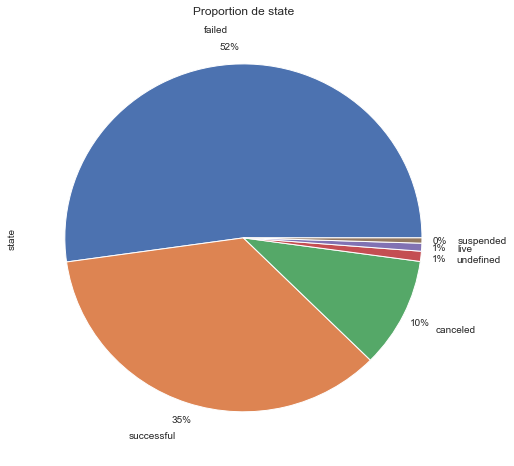

In [270]:
df.state.value_counts().plot.pie(title='Proportion de state', figsize=(8,8),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

**La proportion ....** 

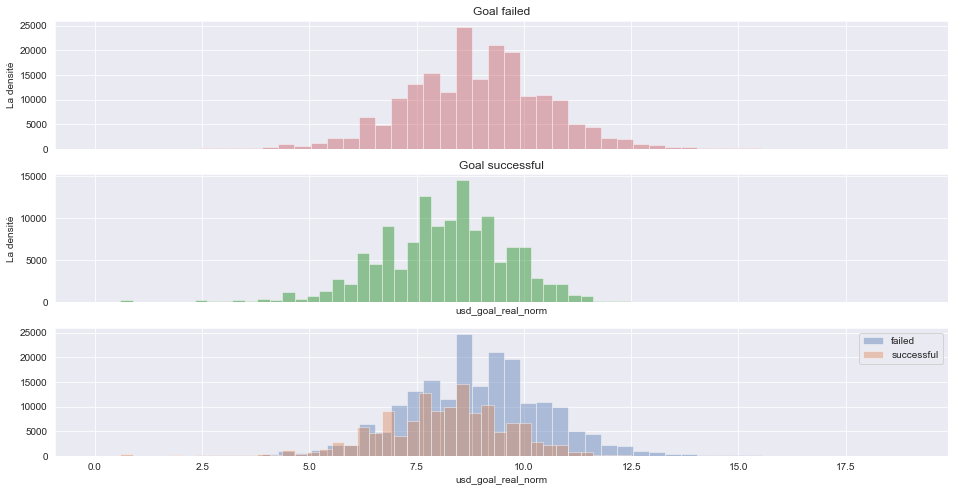

In [271]:
fig, ax = plt.subplots(3, sharex=True)
sns.distplot(df_failed["usd_goal_real_norm"], ax=ax[0], color='r', kde=False)
ax[0].set_title("Goal failed")
ax[0].set_xlabel("")
ax[0].set_ylabel("La densité")
sns.distplot(df_successfull["usd_goal_real_norm"], ax=ax[1], color='green', kde=False)
ax[1].set_title("Goal successful")
ax[1].set_ylabel("La densité")
for a in ["failed", "successful"]:
    sns.distplot(df.loc[df.state == a,"usd_goal_real_norm"], ax=ax[2], kde=False)
ax[2].legend(["failed", "successful"])
#df[df.state == "successful"]

# Goal vs usd_goal_real

(array([3.1600e+02, 2.9000e+01, 1.1700e+02, 4.1500e+02, 4.6300e+02,
        6.4400e+02, 2.2400e+03, 4.5560e+03, 1.0504e+04, 1.5195e+04,
        2.1062e+04, 3.2049e+04, 2.1701e+04, 1.4434e+04, 6.9440e+03,
        2.3760e+03, 5.7400e+02, 2.4600e+02, 7.0000e+01, 2.1000e+01]),
 array([9.95033085e-03, 7.34885726e-01, 1.45982112e+00, 2.18475652e+00,
        2.90969191e+00, 3.63462731e+00, 4.35956270e+00, 5.08449810e+00,
        5.80943349e+00, 6.53436889e+00, 7.25930428e+00, 7.98423968e+00,
        8.70917508e+00, 9.43411047e+00, 1.01590459e+01, 1.08839813e+01,
        1.16089167e+01, 1.23338521e+01, 1.30587874e+01, 1.37837228e+01,
        1.45086582e+01]),
 <a list of 20 Patch objects>)

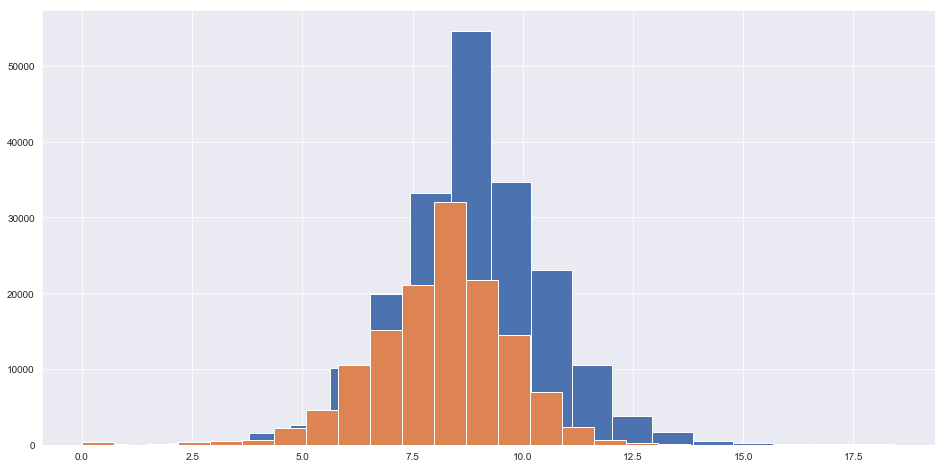

In [272]:
fig, ax = plt.subplots()
ax.hist(df_failed["goal_norm"], bins=20)
ax.hist(df_successfull["goal_norm"], bins=20)

# pledged vs usd pledged:

Text(0.5,1,'usd pledged norm')

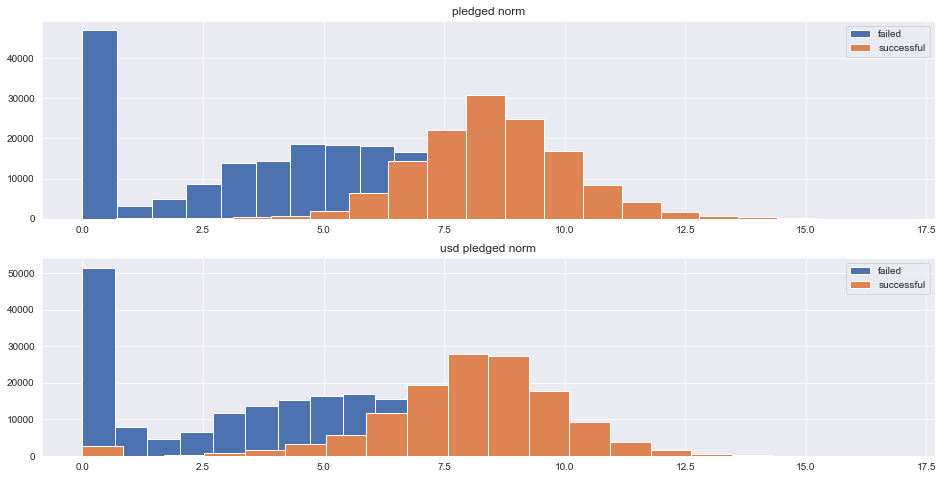

In [273]:
fig, ax = plt.subplots(2)
ax[0].hist(df_failed["pledged_norm"], bins=20)
ax[0].hist(df_successfull["pledged_norm"], bins=20)
ax[0].legend(["failed", "successful"])
ax[0].set_title("pledged norm")
ax[1].hist(df_failed["usd pledged_norm"], bins=20)
ax[1].hist(df_successfull["usd pledged_norm"], bins=20)
ax[1].legend(["failed", "successful"])
ax[1].set_title("usd pledged norm")

# Catégorie:

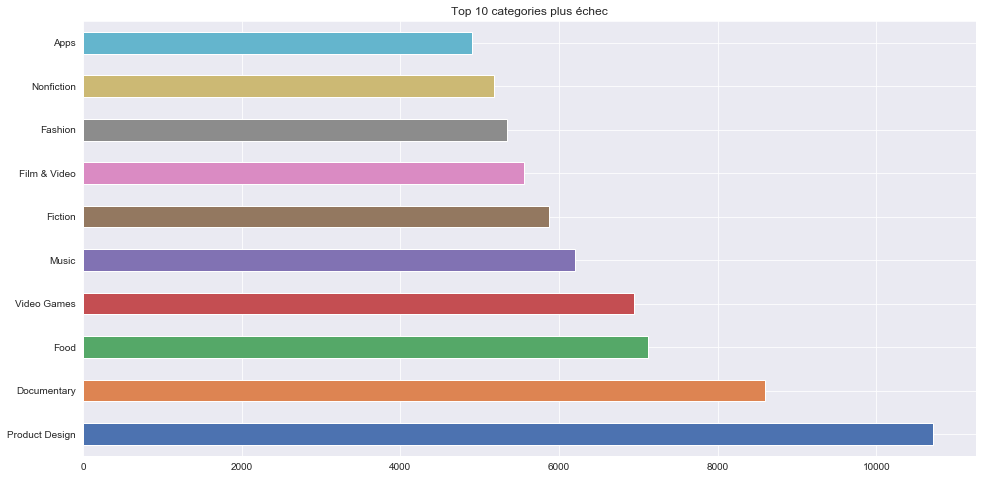

In [283]:
# Top 10 categories plus échec
df_failed.category.value_counts(sort=True).head(10).plot.barh(title="Top 10 categories plus échec")

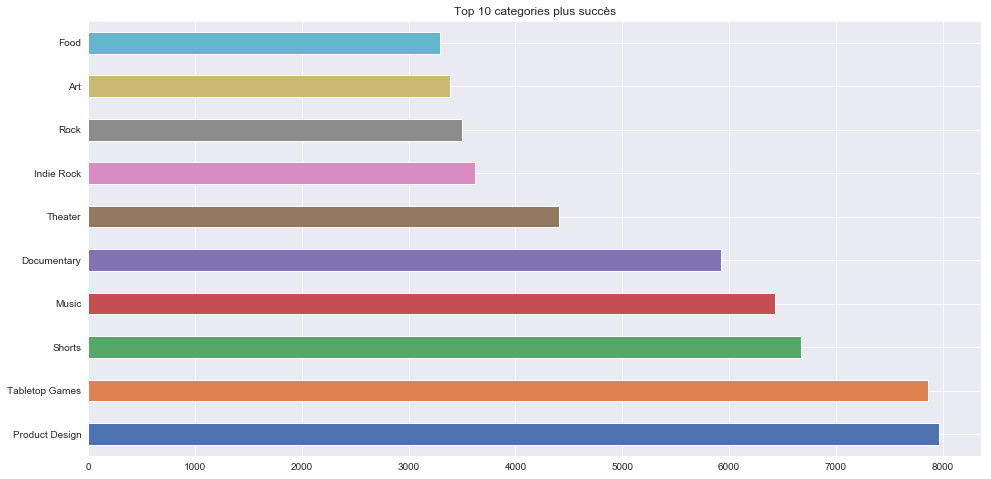

In [284]:
# Top 10 categories plus succès
df_successfull.category.value_counts(sort=True).head(10).plot.barh(title="Top 10 categories plus succès")

- Au niveau de category: Product Design est la catégorie plus succès et plus échec mais le volume d'échec est plus grand que celui de succès

# Main Catégorie:

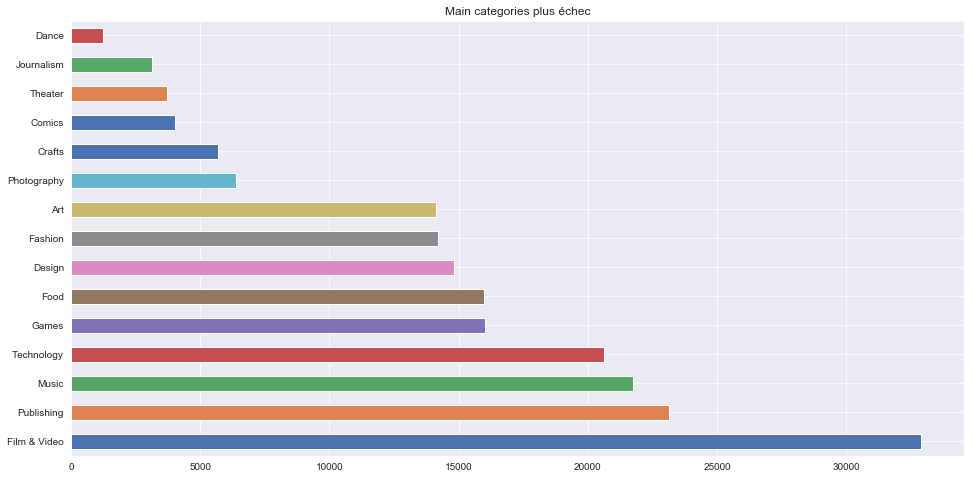

In [285]:
# main categories plus échec
df_failed.main_category.value_counts(sort=True).plot.barh(title="Main categories plus échec")

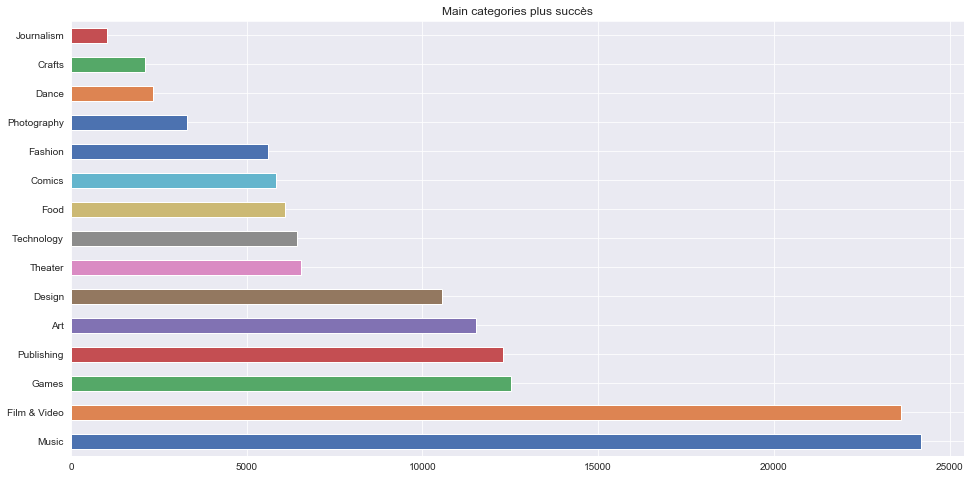

In [286]:
# Main categories plus succès
df_successfull.main_category.value_counts(sort=True).plot.barh(title="Main categories plus succès")

- Music et Film & Video est la main catégorie plus inverti

# Currency:

In [287]:
df.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

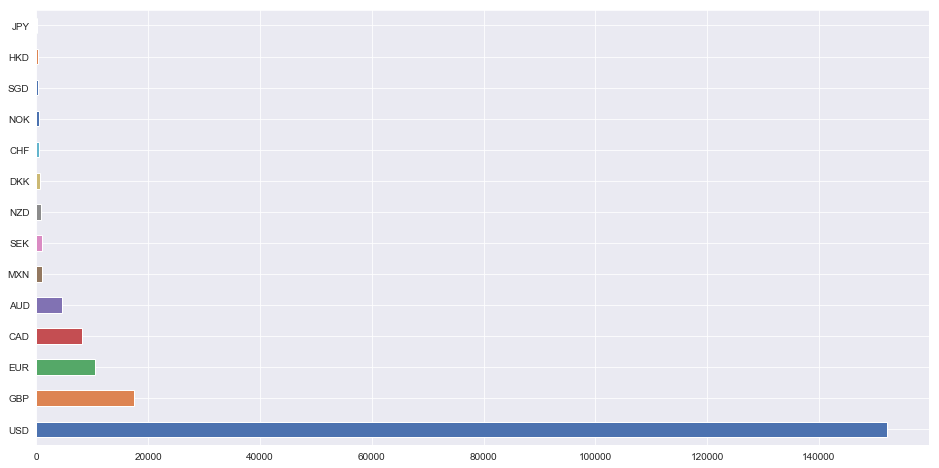

In [288]:
df_failed["currency"].value_counts(sort=True).plot.barh()

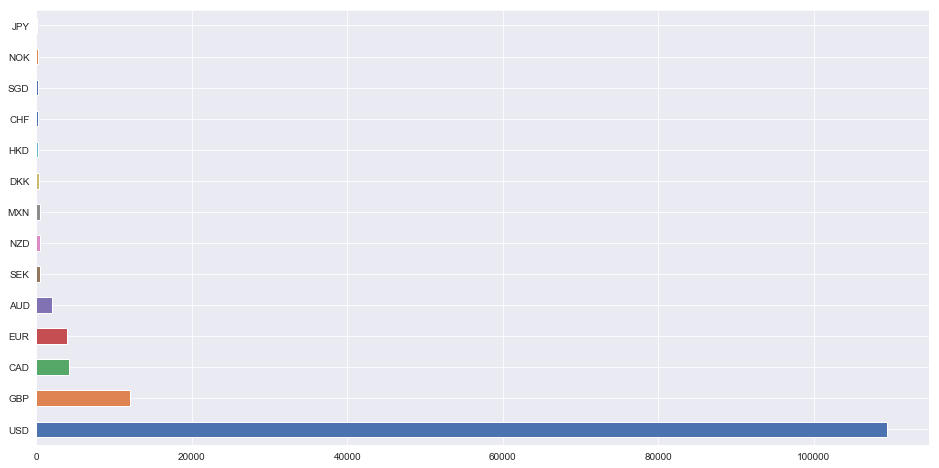

In [289]:
df_successfull["currency"].value_counts(sort=True).plot.barh()

# Backers:

### Above the third quartile + 3 ∗ interquartile range

In [290]:
df['backers'].quantile(0.75) + 3*df['backers'].quantile(0.5)

92.0

On define tout `backers` supérieur à 92 est des outliers

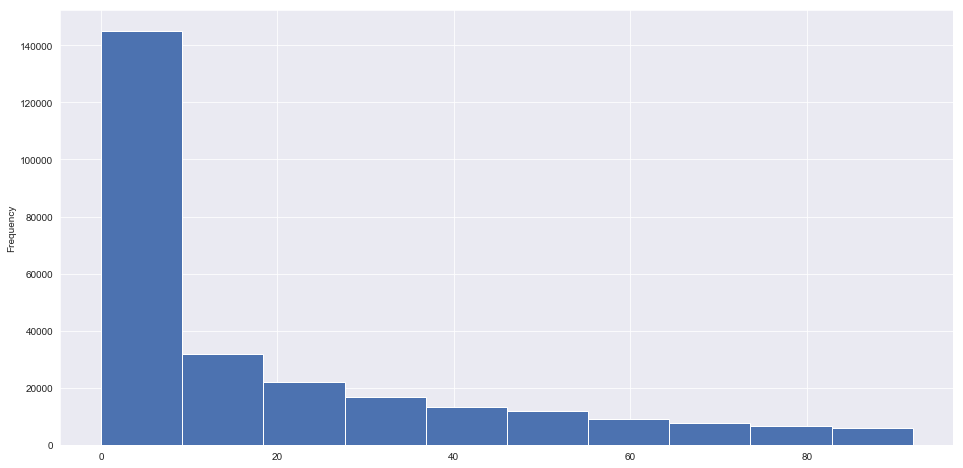

In [291]:
df2[df2.backers <= 92]["backers"].plot.hist()

In [292]:
df2['backers_outliers'] = [True if i > 92 else False for i in df2['backers']]

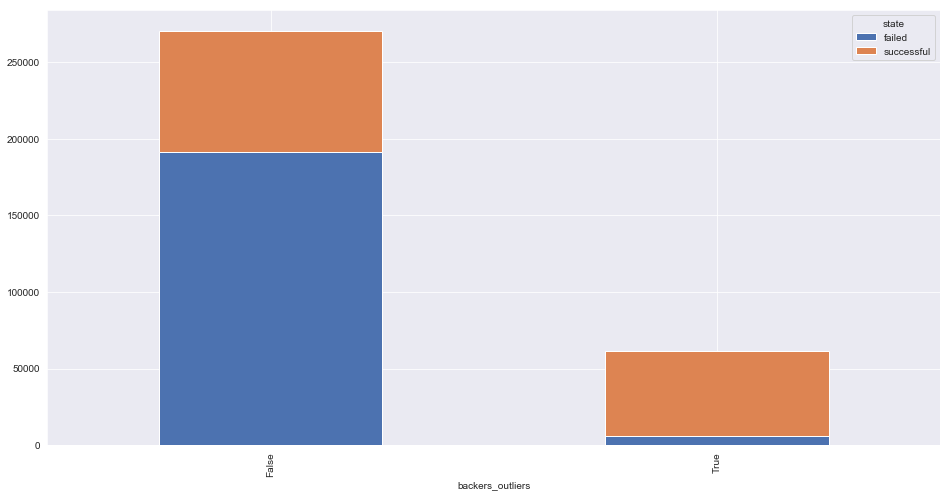

In [293]:
df2.groupby('backers_outliers')['state'].value_counts().unstack().plot.bar(stacked=True)

- Bcp de backers, càd, le projet est bcp de soutient, ce projet est la chance de réussite
- On a vu que la majorité des outliers de backer est le projet réussit

Text(0.5,0,'Backers normed (log)')

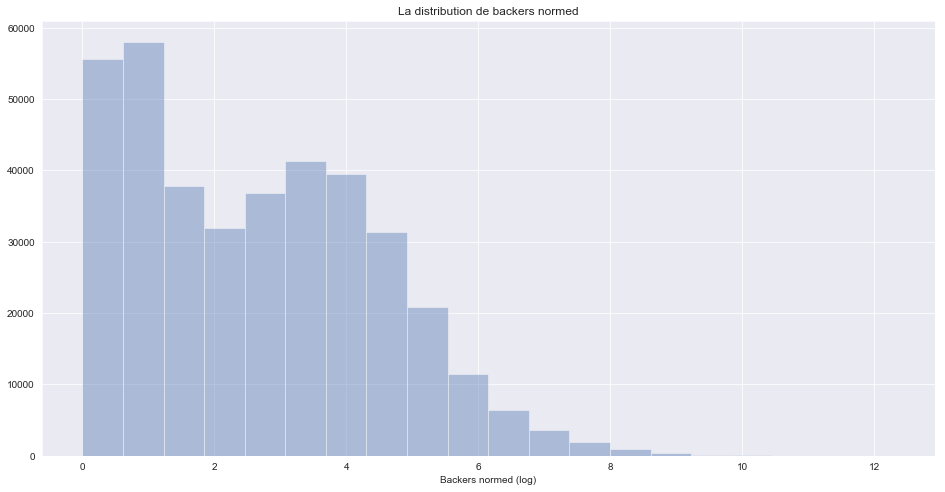

In [294]:
sns.distplot(df["backers_norm"], kde=False, bins=20)
plt.title("La distribution de backers normed")
plt.xlabel("Backers normed (log)")

Text(0.5,0.98,'Backers distribution en state')

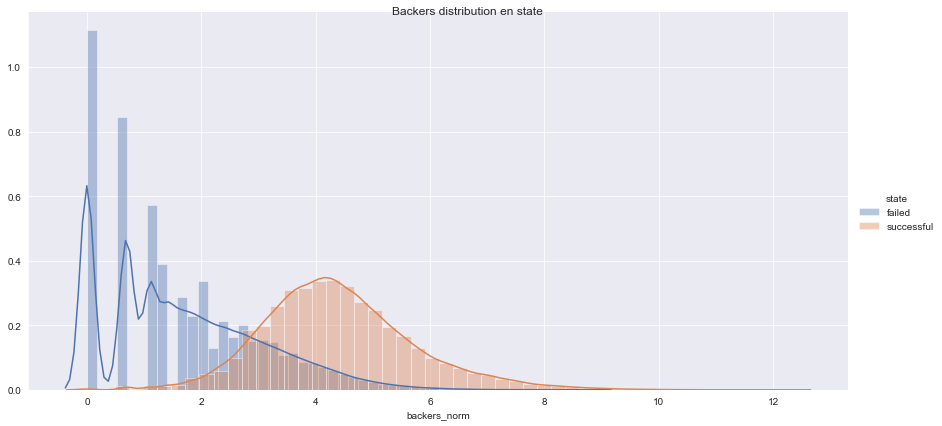

In [295]:
g = sns.FacetGrid(df2, hue='state', height=6, aspect=2)
g.map(sns.distplot,'backers_norm')
g.add_legend()
g.fig.suptitle("Backers distribution en state")

- cette graph nous dit que plus de backers, plus de chance afin du projet réussit

# Country:

In [296]:
df2.country.value_counts()

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

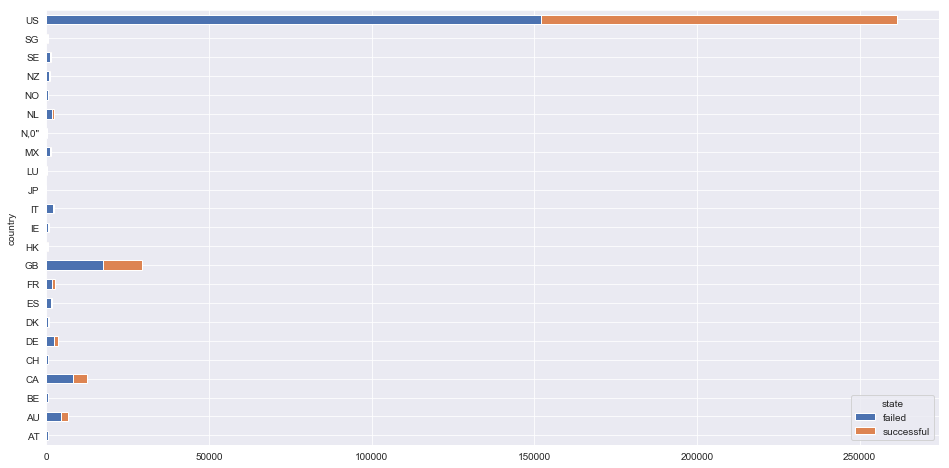

In [297]:
df2.groupby('country')['state'].value_counts().unstack().plot.barh(stacked=True)

**USD est le devise plus utilisé dans le _crowdfunding_, GBP, EUR, CAD, AUD ensuite**

# Date launched:

In [298]:
#pd.Series.dt?

In [318]:
df2['launched_year'] = df2['launched'].dt.year
df2['launched_day'] = df2['launched'].dt.dayofweek
df2['launched_hour'] = df2['launched'].dt.hour
df2['launched_quarter'] = df2['launched'].dt.quarter

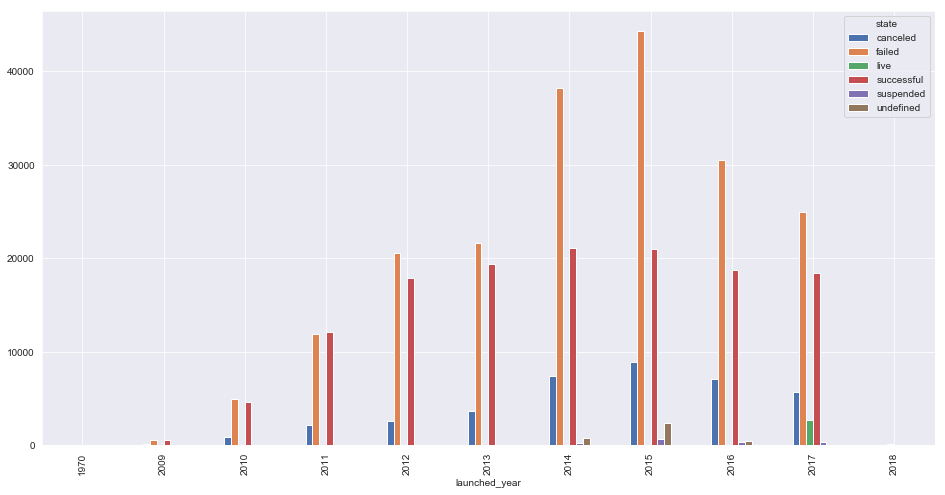

In [300]:
df2.groupby('launched_year')['state'].value_counts().unstack().plot.bar()

- Les projets sont lancé dans l'année 2015 sont plus d'échec par rapport des autres années
- L'année 2015 et 2014 ont même taux de réussite

[Text(0,0,'Lundi'),
 Text(0,0,'Mardi'),
 Text(0,0,'Mercredi'),
 Text(0,0,'Jeudi'),
 Text(0,0,'Vendredi'),
 Text(0,0,'Samedi'),
 Text(0,0,'Dimanche')]

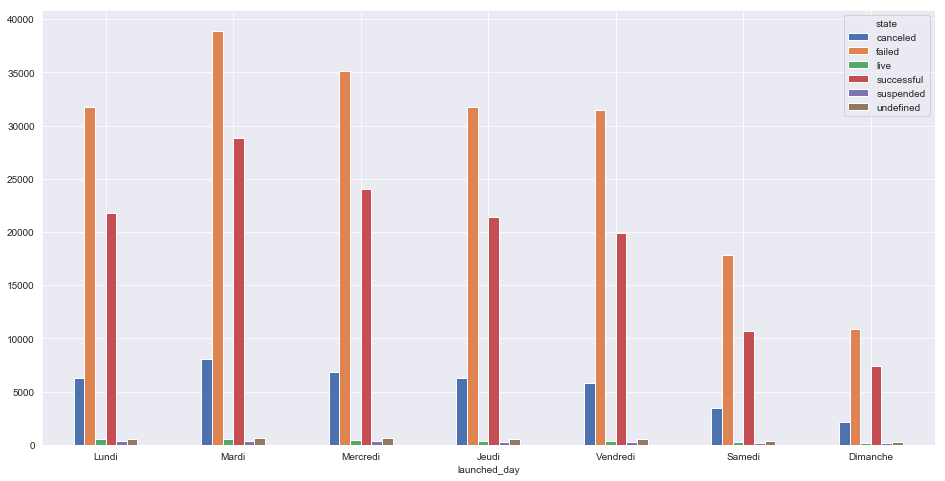

In [301]:
ax = df2.groupby('launched_day')['state'].value_counts().unstack().plot.bar()
ax.set_xticklabels(['Lundi','Mardi','Mercredi',"Jeudi","Vendredi", "Samedi", "Dimanche"],rotation=0)

- Mardi est le jour dans la semaine qui a le taux d'échec et de réussite plus que les autres jours.

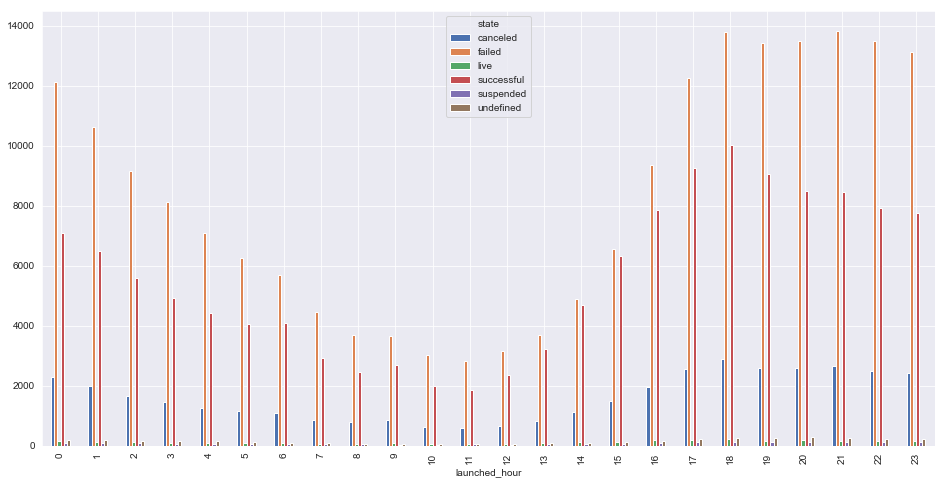

In [302]:
ax = df2.groupby('launched_hour')['state'].value_counts().unstack().plot.bar()

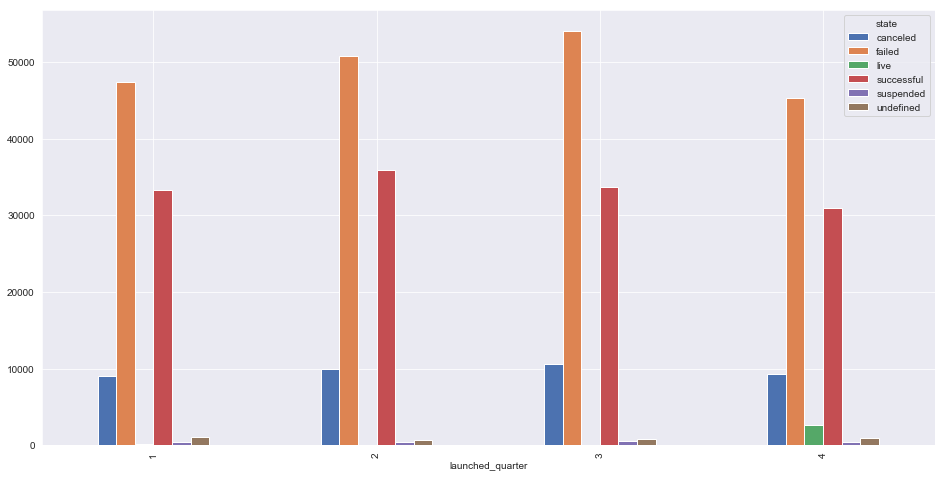

In [303]:
ax = df2.groupby('launched_quarter')['state'].value_counts().unstack().plot.bar()

# Date Deadline:

In [319]:
df2['deadline_year'] = df2['deadline'].dt.year
df2['deadline_day'] = df2['deadline'].dt.dayofweek
df2['deadline_hour'] = df2['deadline'].dt.hour
df2['deadline_quarter'] = df2['deadline'].dt.quarter

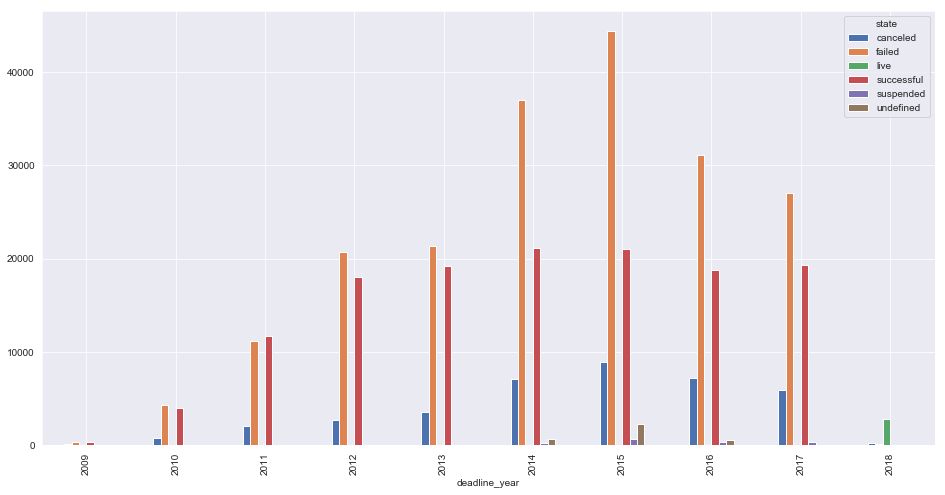

In [305]:
ax = df2.groupby('deadline_year')['state'].value_counts().unstack().plot.bar()

[Text(0,0,'Lundi'),
 Text(0,0,'Mardi'),
 Text(0,0,'Mercredi'),
 Text(0,0,'Jeudi'),
 Text(0,0,'Vendredi'),
 Text(0,0,'Samedi'),
 Text(0,0,'Dimanche')]

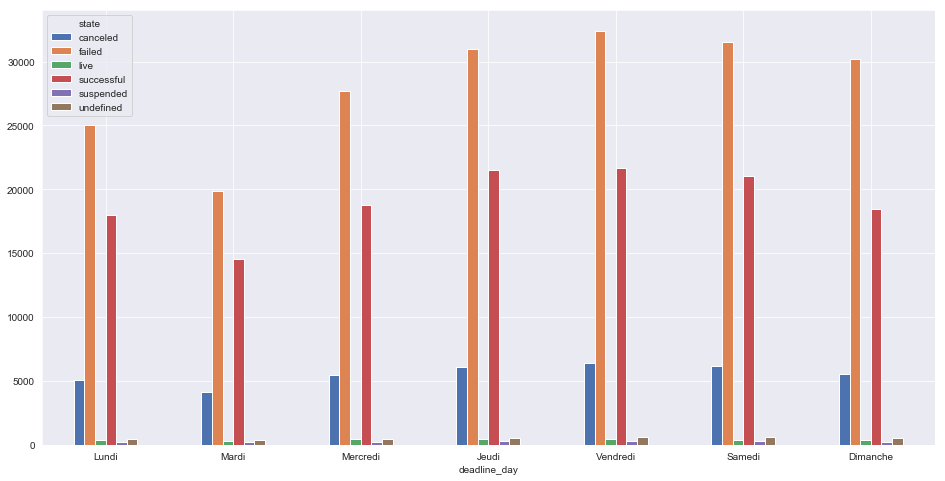

In [306]:
ax = df2.groupby('deadline_day')['state'].value_counts().unstack().plot.bar()
ax.set_xticklabels(['Lundi','Mardi','Mercredi',"Jeudi","Vendredi", "Samedi", "Dimanche"],rotation=0)

- Vendredi est le jour qui a plus de projet d'échec et de réussite

# 6. Analyse Multi-Varié

In [320]:
df2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'backers_outliers',
       'launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter'],
      dtype='object')

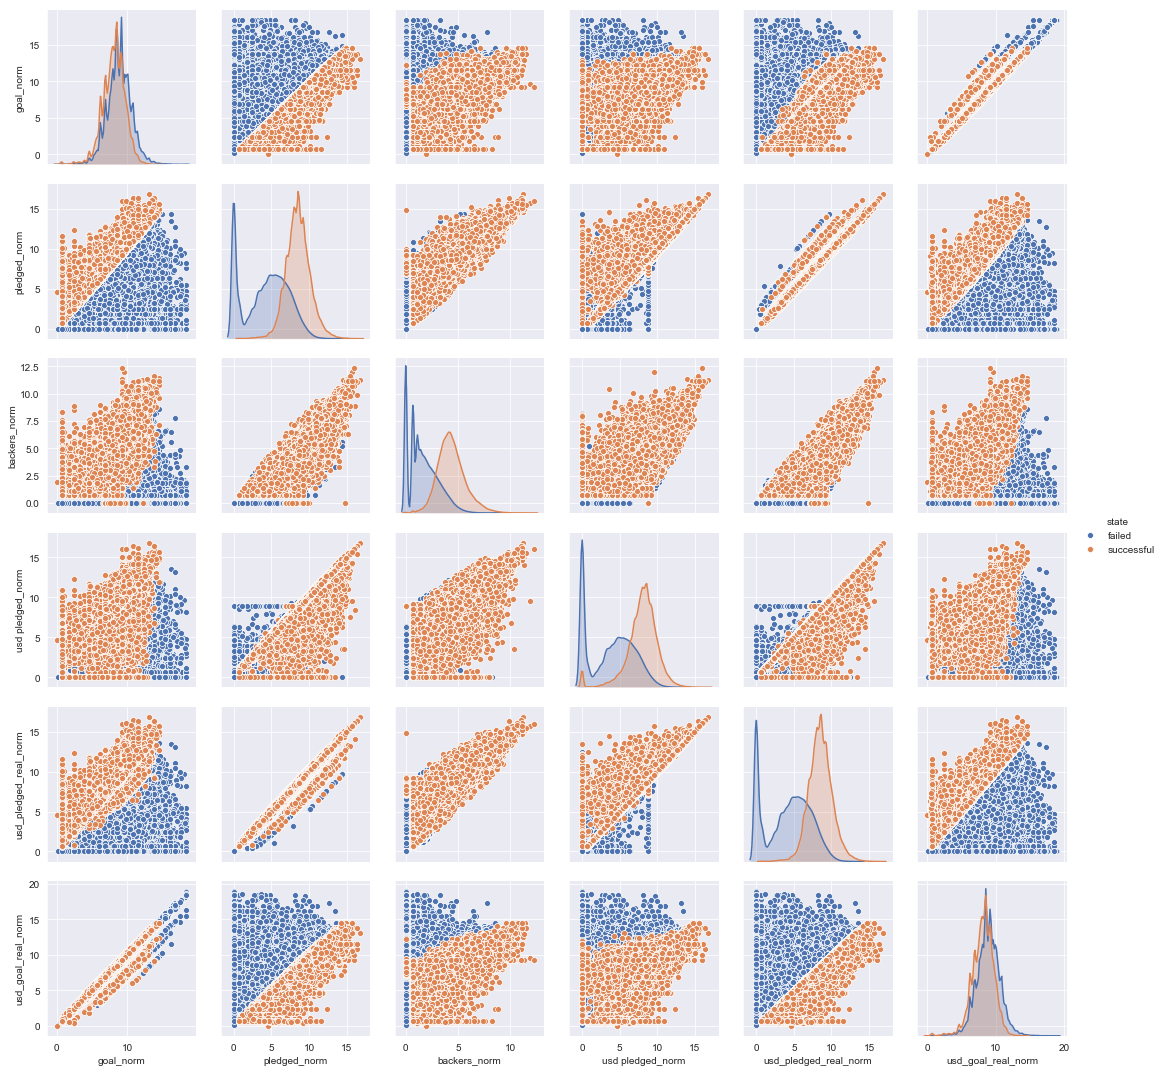

In [309]:
sns.pairplot(data=df2[['goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm','state']],hue='state')

- On voit que `goal` et `usd_goal_real` est lineaire et même`pledged` et `usd_pledged_real` ...

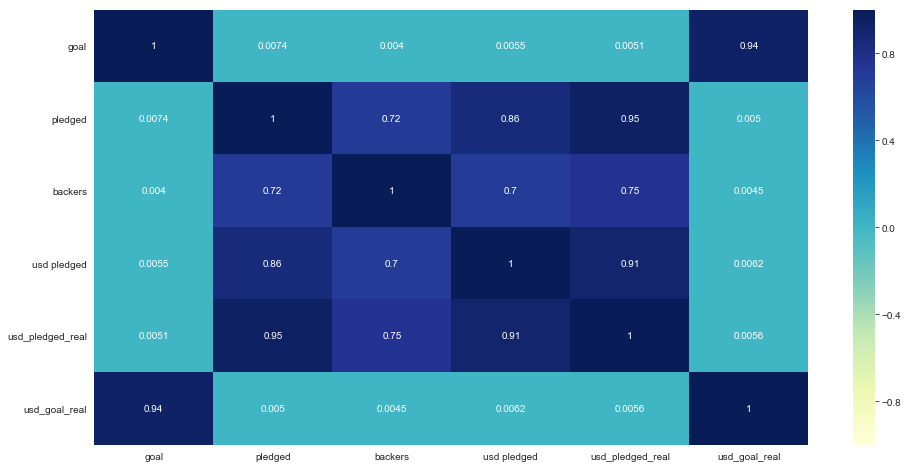

In [213]:
sns.heatmap(df[num_col].corr(),annot=True,vmin=-1,vmax=1, cmap="YlGnBu")

- Forte corrélation entre: 
    - (goal, usd_goal_real); 
    - (pledged,backers); 
    - (pledged, usd pledged); 
    - (pledged, usd_pledged_real); 
    - (backers, usd pledged); 
    - (backers,usd_pledged_real); 
    - (usd pledged, usd_pledged_real)

On choissit `usd_goal_real`, `backers`, `usd_pledged_real`

# Conclusion:
- Product Design est la catégorie plus inverti
- Music et Film & Video est la main catégorie plus inverti
- La feature date a impact important de la réussite du projet.
    - On crees un autre feature qui mesure la duré du _crowdfunding_
- La feature backers est un feature qu'on la référence pour créer l'autre feature comme la feature de interval de backers. 
    - example: `df["backers_inter"`, nombre de `backer` < 12, 12<= `backer` <=65, 65<`backer`<= 100 et `backer` >100.
- USD et GBP et EUR sont les devises plus utilisé
- On a des numériques features qui se sont corrélées 
- On choissit `usd_goal_real`, `backers`, `usd_pledged_real`, `category`, `main category`, `year`, `day`...

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [322]:
df2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'backers_outliers',
       'launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter'],
      dtype='object')

In [323]:
feature = ['category','main_category', 'currency', 'country', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm','launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter']

In [336]:
df2[feature+['state']].dtypes

category                  object
main_category             object
currency                  object
country                   object
goal_norm                float64
pledged_norm             float64
backers_norm             float64
usd pledged_norm         float64
usd_pledged_real_norm    float64
usd_goal_real_norm       float64
launched_year              int64
launched_day               int64
launched_hour              int64
launched_quarter           int64
deadline_year              int64
deadline_day               int64
deadline_hour              int64
deadline_quarter           int64
state                     object
dtype: object

## One hot encoding:

In [340]:
df3 = df2[feature+['state']].copy()
from sklearn.preprocessing  import LabelEncoder
for c in ['category','main_category', 'currency', 'country', 'launched_year']:
    df3[c].astype(str)
    le = LabelEncoder()
    le.fit(df3[c])
    df3[c] = le.transform(df3[c])
df3[['category','main_category', 'currency', 'country', 'launched_year']].head()

,category,main_category,currency,country,launched_year
0,108,12,5,9,6
1,93,6,13,22,8
2,93,6,13,22,4
3,90,10,13,22,3
5,123,7,13,22,7


In [341]:
df3.columns

Index(['category', 'main_category', 'currency', 'country', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'launched_year',
       'launched_day', 'launched_hour', 'launched_quarter', 'deadline_year',
       'deadline_day', 'deadline_hour', 'deadline_quarter', 'state'],
      dtype='object')

In [346]:
df3['state'].values

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype=object)

In [348]:
dt = df3.copy()
y = [1 if i == "successful" else 0 for i in dt['state'].values]
x = dt.drop('state',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
clf = LogisticRegression()
clf.fit(x_train.values, y_train)
y_pred = clf.predict(x_test)
print(f"{100*accuracy_score(y_test,y_pred):.2f}%")

99.77%


# petit conclusion:
- Si on prend tout les features, on obtienne 99,77% model exac